<a href="https://colab.research.google.com/github/Kazak147480/traceability_label_classifier/blob/main/Traceability_Label_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 5.2 MB/s 
     |████████████████████████████████| 5.5 MB 58.5 MB/s 
     |████████████████████████████████| 441 kB 67.9 MB/s 
     |████████████████████████████████| 1.3 MB 53.9 MB/s 
     |████████████████████████████████| 1.6 MB 53.2 MB/s 
     |████████████████████████████████| 95 kB 5.5 MB/s 
     |████████████████████████████████| 212 kB 52.4 MB/s 
     |████████████████████████████████| 163 kB 64.4 MB/s 
     |████████████████████████████████| 115 kB 59.6 MB/s 
     |████████████████████████████████| 127 kB 69.8 MB/s 
     |████████████████████████████████| 115 kB 71.6 MB/s 
     |████████████████████████████████| 7.6 MB 52.3 MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
path = Path('gdrive/My Drive/traceability labels')

In [ ]:
labels = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 get_y=parent_label,
                 splitter=RandomSplitter(valid_pct=0.2, seed=42),
                 item_tfms=Resize(224))
dls = labels.dataloaders(path, bs=32)

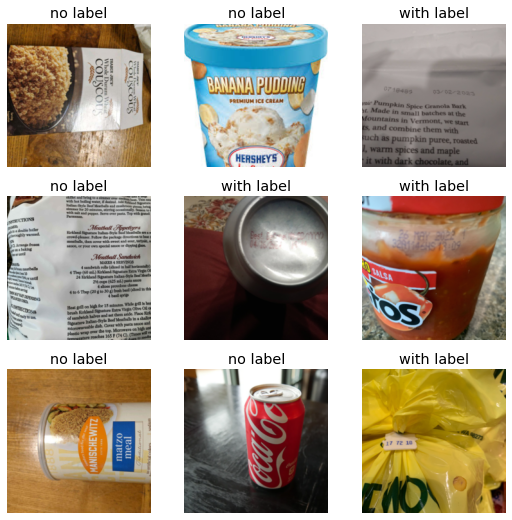

In [ ]:
dls.show_batch(nrows=3, ncols=3)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.184511,0.859796,0.388889,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.853961,0.896191,0.333333,00:41
1,0.637249,0.707586,0.259259,00:42
2,0.485930,0.764832,0.203704,00:41
3,0.395949,0.677026,0.166667,00:41
4,0.320182,0.587290,0.185185,00:41
5,0.266074,0.561802,0.166667,00:42


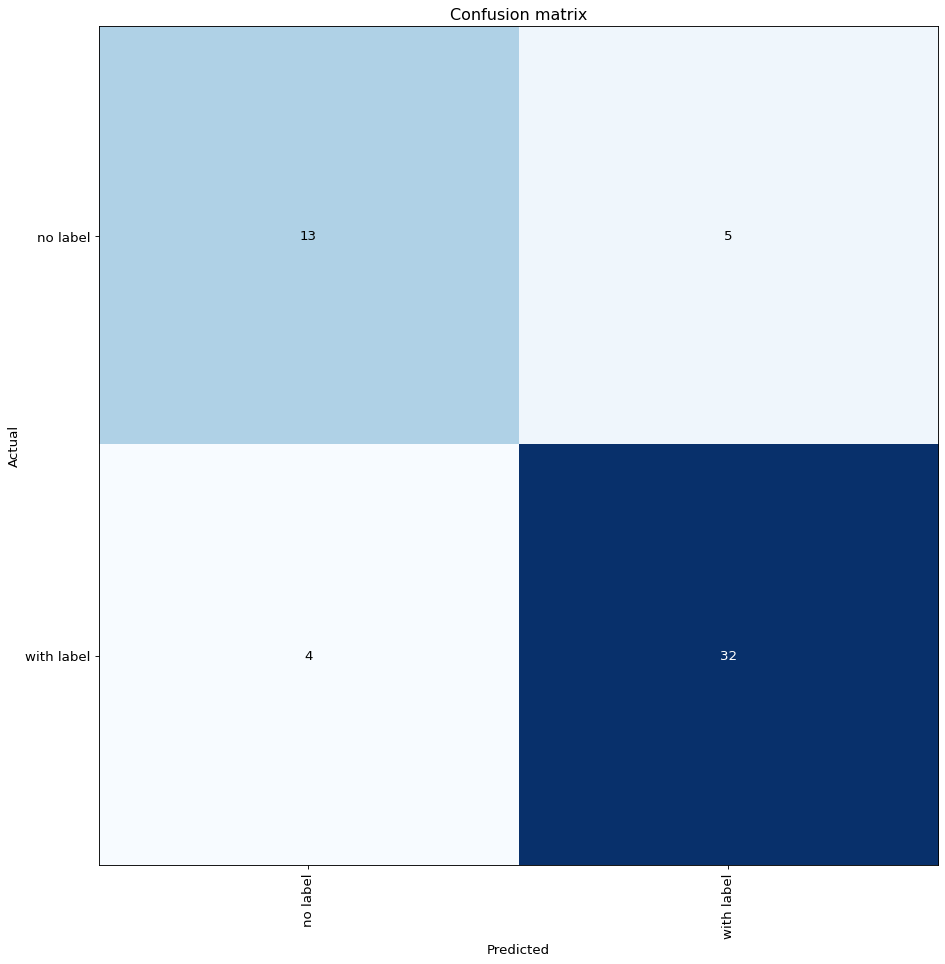

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=80)

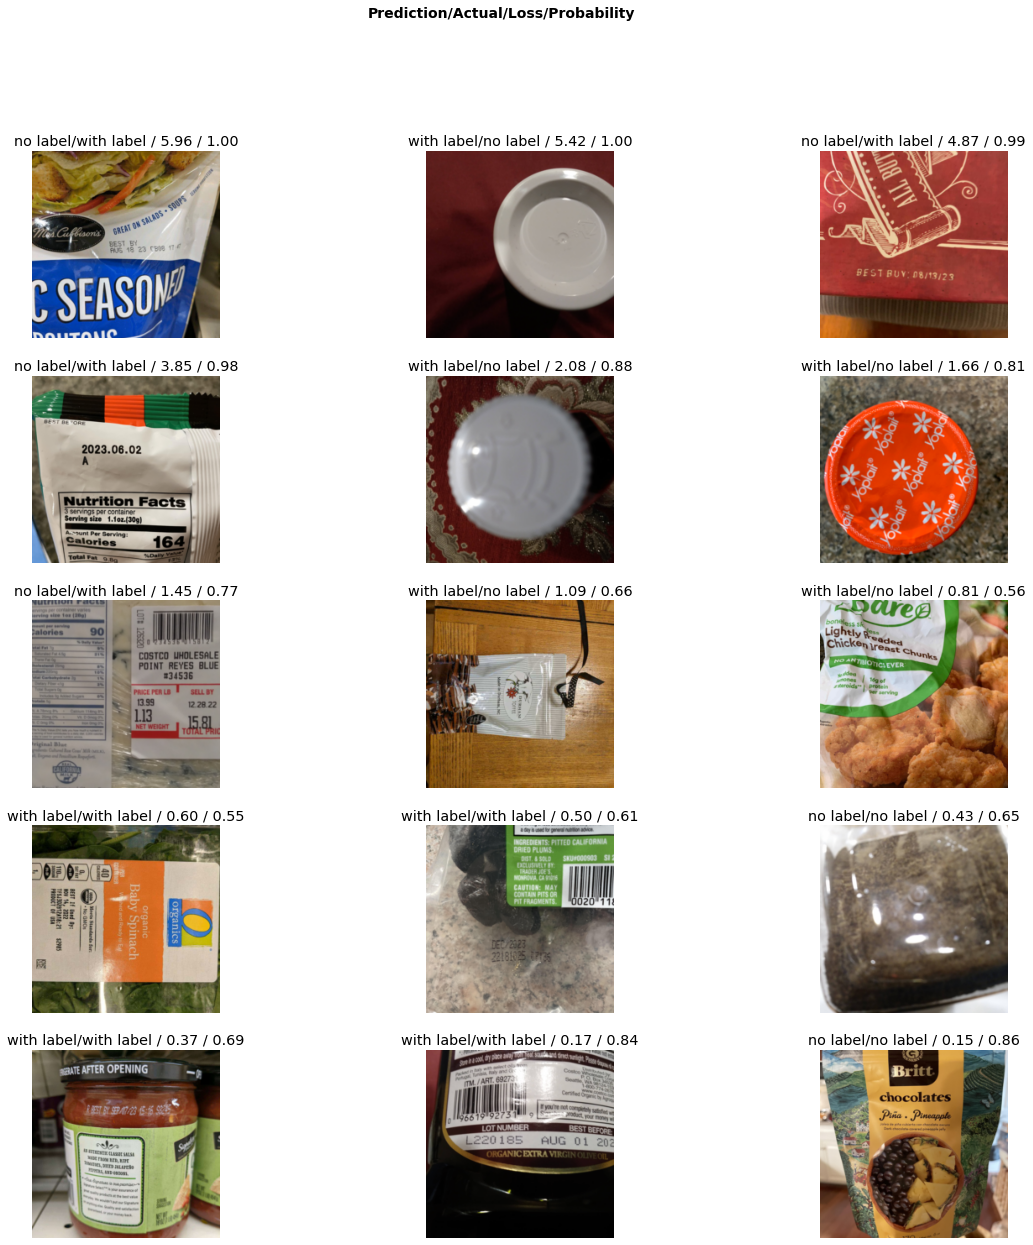

In [ ]:
interp.plot_top_losses(15, nrows=5, figsize=(20,20))

In [57]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [58]:
path = Path('gdrive/My Drive')
learn_inf = load_learner(path/'export.pkl')

In [59]:
from fastai.vision.all import *
from fastai.vision.widgets import *

learn_inf = load_learner(path/'export.pkl')

btn_upload = widgets.FileUpload()

btn_run = widgets.Button(description='Classify')

out_pl = widgets.Output()
lbl_pred = widgets.Label()

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

VBox([widgets.Label('Select your image:'), btn_upload, btn_run, out_pl, lbl_pred])